In [ ]:
pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c90d9d7715c3d7d5036751df9462e751231fc7b0a062170456a2b384745f1fa0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [ ]:
pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-3-98f09099f855>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport  # For newer versions of pandas-profiling

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving red_wine.csv to red_wine (2).csv


In [ ]:
# Load the red wine dataset
red_wine = pd.read_csv("red_wine.csv")

# Generate the profile report
profile = ProfileReport(red_wine, title="Red Wine Data Profile")
profile.to_file("red_wine_profile.html")

print("Pandas Profiling report generated: red_wine_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 49.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report generated: red_wine_profile.html


In [12]:
from google.colab import files

files.download("red_wine_profile.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#Model Fitting and Cross-Validation

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np  # Import NumPy

# Load the red wine dataset
red_wine = pd.read_csv("red_wine.csv")

# Preprocessing: Encode the 'type' column to numerical values
label_encoder = LabelEncoder()
red_wine['type'] = label_encoder.fit_transform(red_wine['type'])  # high: 0, low: 1

# Prepare data for scikit-learn
X = red_wine.drop('type', axis=1)
y = red_wine['type']


def calculate_baseline_auc(y):
    """Calculates the AUC of a random classifier (baseline)."""
    # The AUC of a random classifier is always 0.5
    return 0.5


def calculate_baseline_accuracy(y):
    """Calculates the baseline accuracy by predicting the majority class."""
    majority_class = y.value_counts().idxmax()
    return (y == majority_class).sum() / len(y)


# Define models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM-Linear': LinearSVC(random_state=42, max_iter=10000), # Increased max_iter
    'SVM-RBF': SVC(kernel='rbf', random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Configure cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Performance metrics calculation
results = {}
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    if name == 'Baseline':
        auc_scores = np.array([calculate_baseline_auc(y)] * cv.get_n_splits())
        accuracy_scores = np.array([calculate_baseline_accuracy(y)] * cv.get_n_splits())
    else:
        auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')  # Add accuracy calculation
    results[name] = {'AUC': auc_scores.mean(), 'Accuracy': accuracy_scores.mean()}


# Print results in a table-like format
print("\nModel Performance (10-fold Cross-Validation):")
print("----------------------------------------------------------")
print("{:<20} {:<15} {:<15}".format("Model", "AUC", "Accuracy"))
print("----------------------------------------------------------")
for name, scores in results.items():
    print("{:<20} {:<15.4f} {:<15.4f}".format(name, scores['AUC'], scores['Accuracy']))

Training and evaluating Baseline...
Training and evaluating Logistic Regression...
Training and evaluating Naive Bayes...
Training and evaluating Decision Tree...
Training and evaluating SVM-Linear...
Training and evaluating SVM-RBF...
Training and evaluating Random Forest...

Model Performance (10-fold Cross-Validation):
----------------------------------------------------------
Model                AUC             Accuracy       
----------------------------------------------------------
Baseline             0.5000          0.5289         
Logistic Regression  0.8776          0.7776         
Naive Bayes          0.8984          0.8197         
Decision Tree        0.8152          0.8143         
SVM-Linear           0.8828          0.7951         
SVM-RBF              0.8612          0.5413         
Random Forest        0.9306          0.8459         


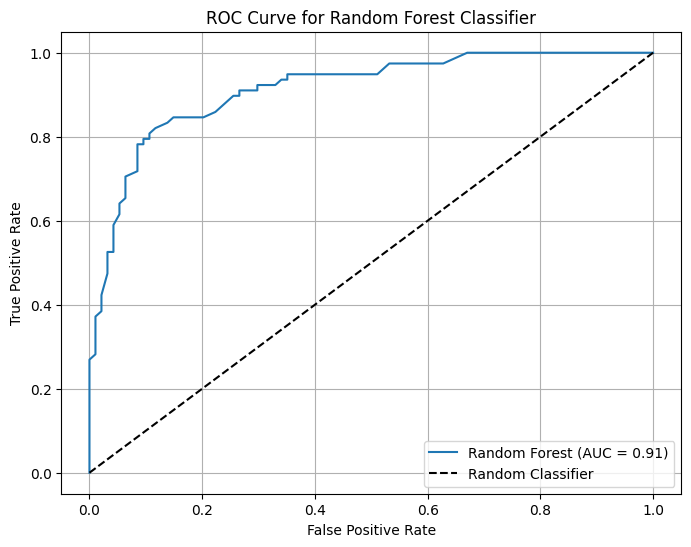

In [15]:
#ROC Curve Plot for Random Forest

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Load the red wine dataset
red_wine = pd.read_csv("red_wine.csv")

# Preprocessing: Encode the 'type' column to numerical values
label_encoder = LabelEncoder()
red_wine['type'] = label_encoder.fit_transform(red_wine['type'])  # high: 0, low: 1

# Prepare data for scikit-learn
X = red_wine.drop('type', axis=1)
y = red_wine['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from google.colab import files
uploaded = files.upload()

Saving red_wine.csv to red_wine (3).csv
Saving white_wine.csv to white_wine.csv


In [17]:
# Evaluation on White Wine Data

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the datasets
red_wine = pd.read_csv("red_wine.csv")
white_wine = pd.read_csv("white_wine.csv")

# Preprocessing: Encode the 'type' column to numerical values
label_encoder = LabelEncoder()
red_wine['type'] = label_encoder.fit_transform(red_wine['type'])  # high: 0, low: 1
white_wine['type'] = label_encoder.fit_transform(white_wine['type'])  # high: 0, low: 1

# Prepare data for scikit-learn
X_train = red_wine.drop('type', axis=1)
y_train = red_wine['type']
X_test = white_wine.drop('type', axis=1)
y_test = white_wine['type']

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities on the white wine dataset
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC score on the white wine dataset
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC score on white wine dataset: {auc_score:.4f}")

AUC score on white wine dataset: 0.9740
